In [ ]:
realImages={
"personA":"/content/drive/MyDrive/CV_Dataset/Real_Data/personA/A.png",
"personB":"/content/drive/MyDrive/CV_Dataset/Real_Data/personB/B.png",
"personC":"/content/drive/MyDrive/CV_Dataset/Real_Data/personC/C.png",
"personD":"/content/drive/MyDrive/CV_Dataset/Real_Data/personD/D.png",
"personE":"/content/drive/MyDrive/CV_Dataset/Real_Data/personE/E.png" 
}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import tensorflow
from tensorflow import keras
from flask import Flask, render_template, request
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import pandas as pd
import warnings
import cv2
import glob
import os
from google.colab.patches import cv2_imshow
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
def predict_person(model_classification, path):
  labels = ['personA', 'personB', 'personC', 'personD', 'personE']
  image = load_img(path, target_size=(224, 224))
  img = np.array(image)
  img = img / 255.0
  img = img.reshape(1, 224, 224, 3)
  VGG_model = model_classification
  predictions = VGG_model.predict(img)
  person = labels[predictions.argmax()]
  return person

In [ ]:
def detect_similarity(model_similarity, real_img, img, threshold=0.5):
  image1 = cv2.imread(real_img)
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
  image1 = cv2.resize(image1, (128, 128))

  image2 = cv2.imread(img)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
  image2 = cv2.resize(image2, (128, 128))

  im1 = preprocess_input(image1)
  im2 = preprocess_input(image2)

  model = model_similarity
  embedding1 = model.predict(np.array([im1]))
  embedding2 = model.predict(np.array([im2]))
  distance = np.sum(np.square(embedding1-embedding2), axis=-1)
  
  L = ['Forged','Real']
  prediction = np.where(distance<=threshold, 1, 0)
  
  return L[prediction[0]]

In [ ]:
import cv2
from matplotlib import pyplot as plt

def plot(im1,im2):
  # create figure
  fig = plt.figure(figsize=(10, 7))
  
  # setting values to rows and column variables
  rows = 1
  columns = 2
    
  # reading images
  Image1 = cv2.imread(im1)
  Image2 = cv2.imread(im2)
  
  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  # showing image
  plt.imshow(Image1)
  plt.axis('off')
  plt.title("Real")
  
  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
  # showing image
  plt.imshow(Image2)
  plt.axis('off')
  plt.title("Test")

1/1 [==============================] - 0s 105ms/step


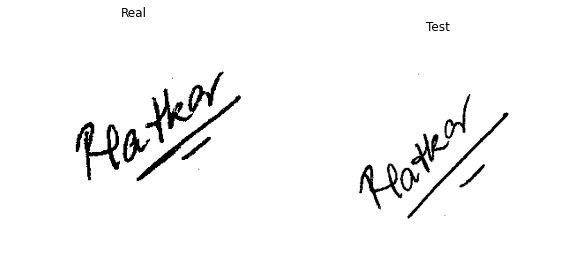

Test image: A_R
Class: personA, This signature is Real
1/1 [==============================] - 0s 113ms/step


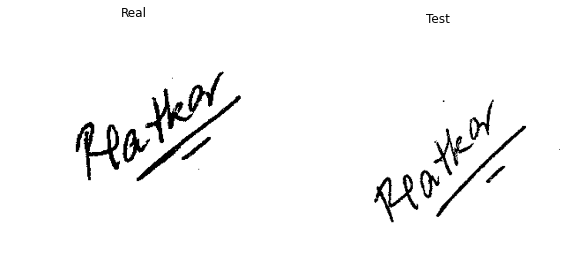

Test image: A_R
Class: personA, This signature is Real
1/1 [==============================] - 0s 120ms/step


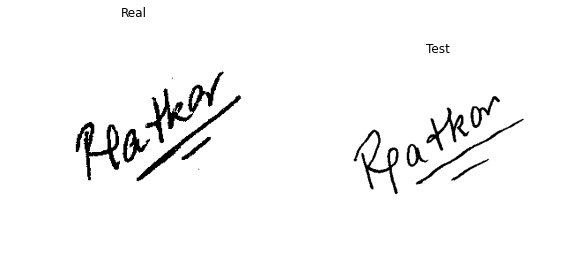

Test image: A_F
Class: personA, This signature is Forged
1/1 [==============================] - 0s 113ms/step


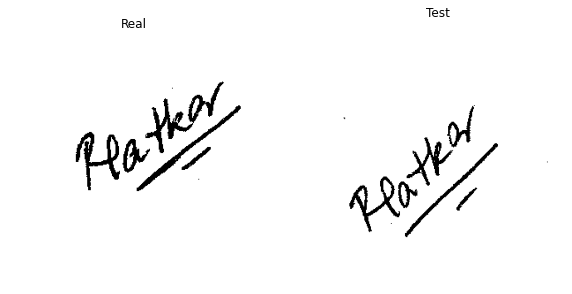

Test image: A_R.png
Class: personA, This signature is Real
1/1 [==============================] - 0s 115ms/step


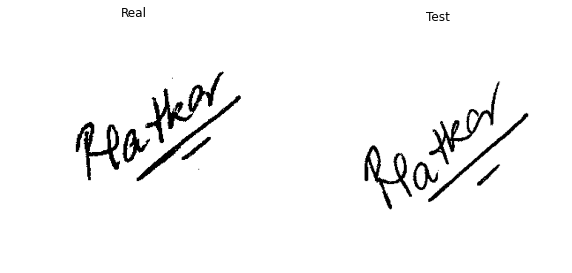

Test image: A_R
Class: personA, This signature is Real
1/1 [==============================] - 0s 106ms/step


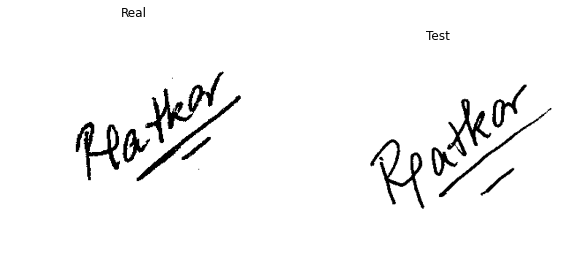

Test image: A_F.png
Class: personA, This signature is Forged
1/1 [==============================] - 0s 108ms/step


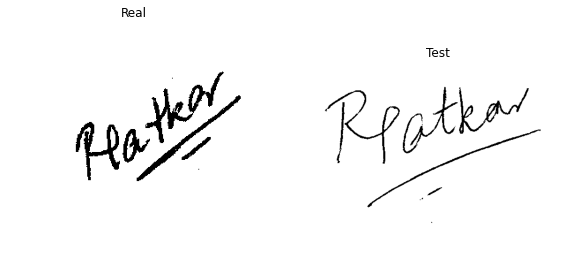

Test image: A_F
Class: personA, This signature is Forged
1/1 [==============================] - 0s 110ms/step


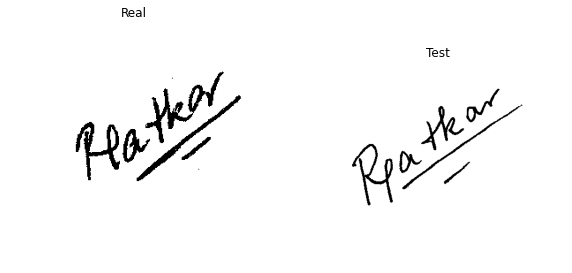

Test image: A_F
Class: personA, This signature is Forged
1/1 [==============================] - 0s 111ms/step


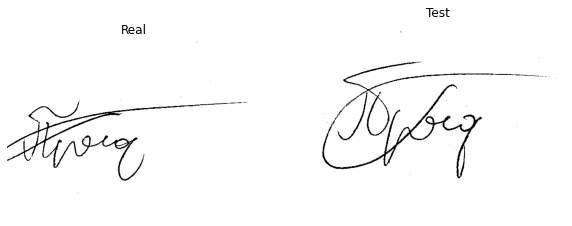

Test image: B_R
Class: personB, This signature is Real
1/1 [==============================] - 0s 108ms/step


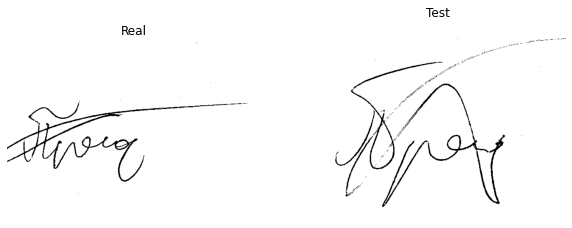

Test image: B_R
Class: personB, This signature is Real
1/1 [==============================] - 0s 108ms/step


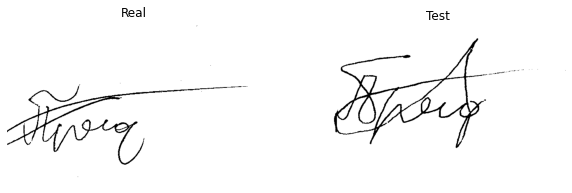

Test image: B_F
Class: personB, This signature is Forged
1/1 [==============================] - 0s 119ms/step


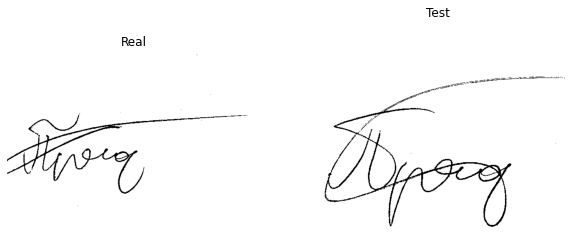

Test image: B_R.png
Class: personB, This signature is Real
1/1 [==============================] - 0s 102ms/step


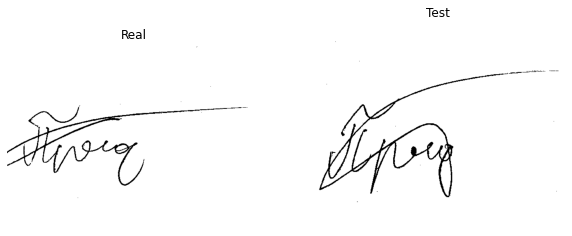

Test image: B_R
Class: personB, This signature is Real
1/1 [==============================] - 0s 101ms/step


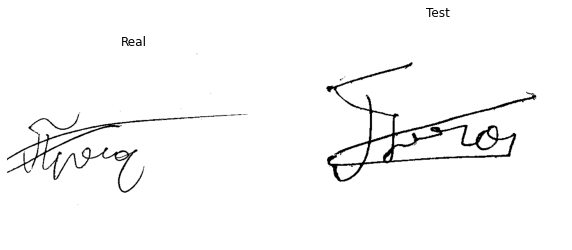

Test image: B_F.png
Class: personB, This signature is Forged
1/1 [==============================] - 0s 111ms/step


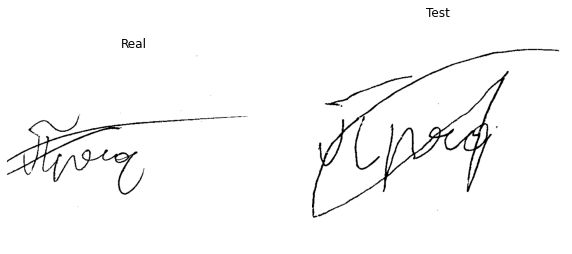

Test image: B_F
Class: personB, This signature is Forged
1/1 [==============================] - 0s 111ms/step


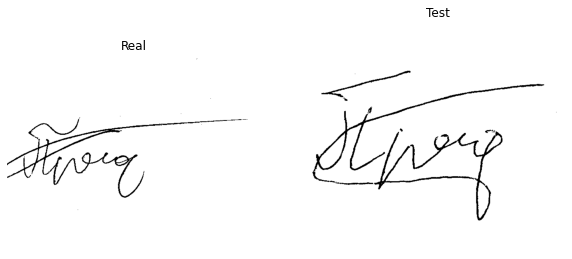

Test image: B_F
Class: personB, This signature is Real
1/1 [==============================] - 0s 110ms/step


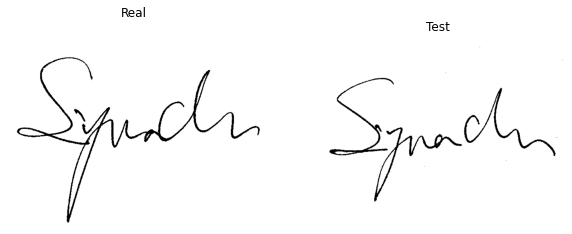

Test image: C_R
Class: personC, This signature is Real
1/1 [==============================] - 0s 109ms/step


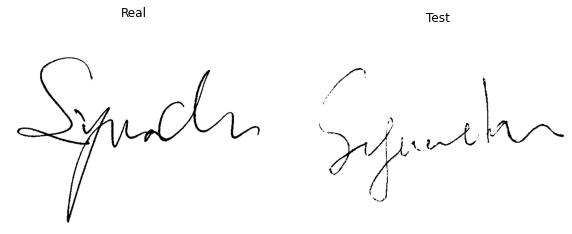

Test image: C_F
Class: personC, This signature is Forged
1/1 [==============================] - 0s 106ms/step


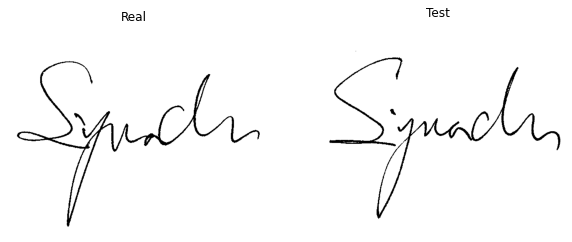

Test image: C_R
Class: personC, This signature is Real
1/1 [==============================] - 0s 113ms/step


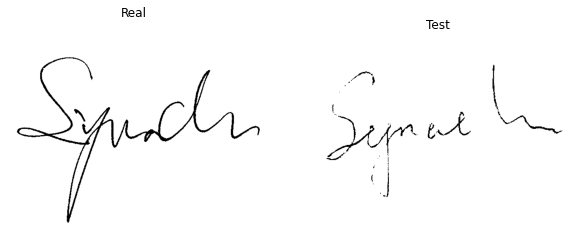

Test image: C_F
Class: personC, This signature is Forged
1/1 [==============================] - 0s 103ms/step


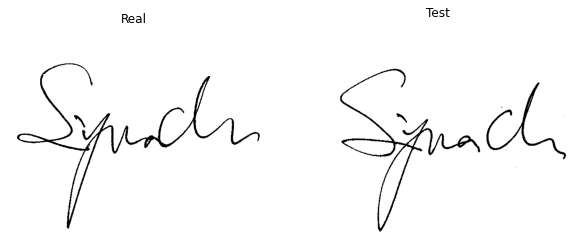

Test image: C_R.png
Class: personC, This signature is Real
1/1 [==============================] - 0s 126ms/step


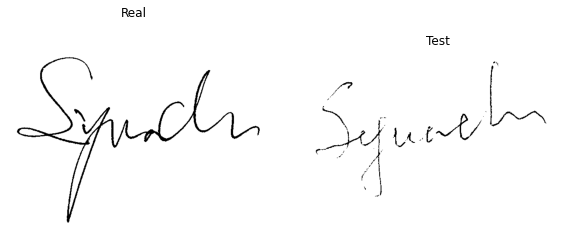

Test image: C_F.png
Class: personC, This signature is Forged
1/1 [==============================] - 0s 101ms/step


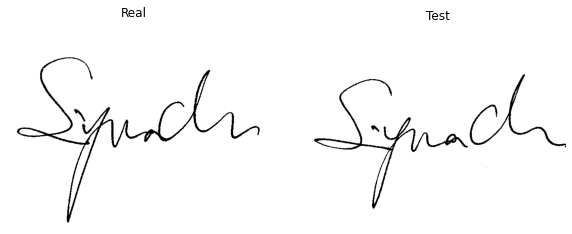

Test image: C_R
Class: personC, This signature is Real
1/1 [==============================] - 0s 112ms/step


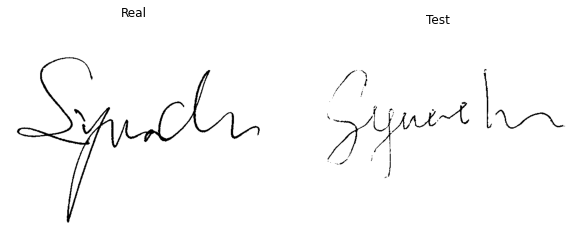

Test image: C_F
Class: personC, This signature is Forged
1/1 [==============================] - 0s 110ms/step


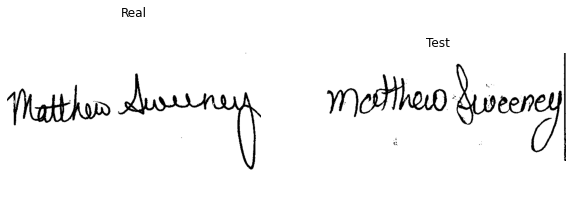

Test image: D_F
Class: personD, This signature is Forged
1/1 [==============================] - 0s 105ms/step


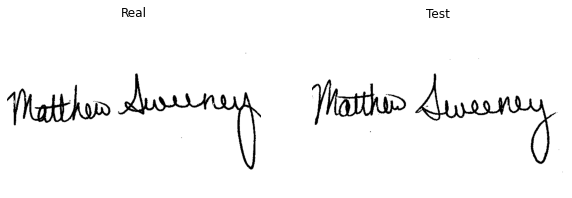

Test image: D_R
Class: personD, This signature is Real
1/1 [==============================] - 0s 106ms/step


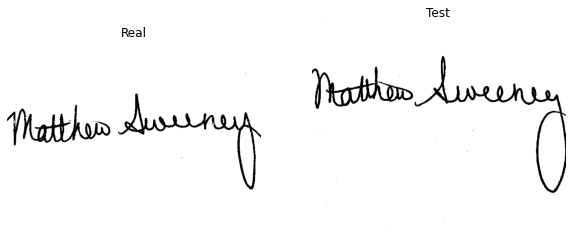

Test image: D_R.png
Class: personD, This signature is Real
1/1 [==============================] - 0s 109ms/step


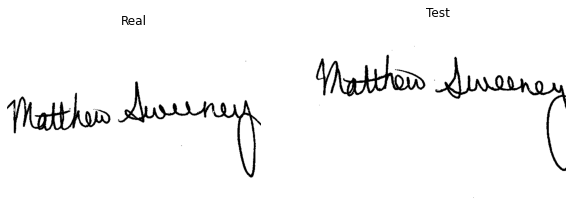

Test image: D_R
Class: personD, This signature is Real
1/1 [==============================] - 0s 110ms/step


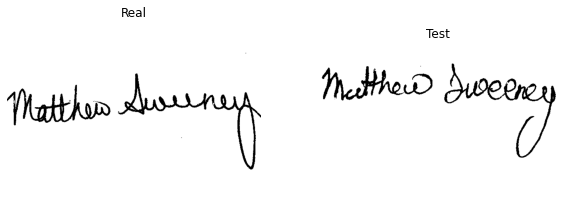

Test image: D_F
Class: personD, This signature is Forged
1/1 [==============================] - 0s 111ms/step


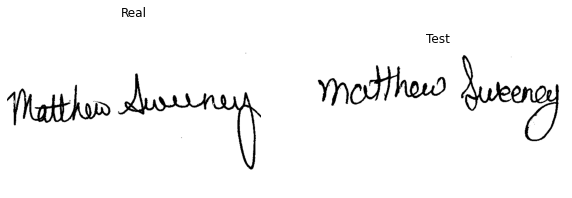

Test image: D_F.png
Class: personD, This signature is Forged
1/1 [==============================] - 0s 116ms/step


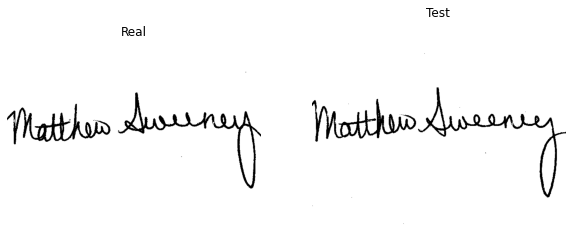

Test image: D_R
Class: personD, This signature is Real
1/1 [==============================] - 0s 106ms/step


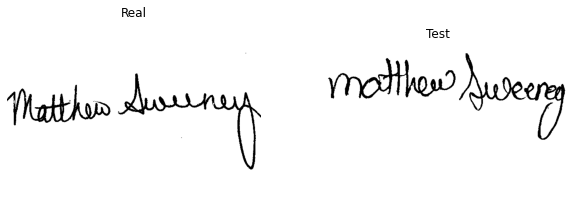

Test image: D_F
Class: personD, This signature is Forged
1/1 [==============================] - 0s 104ms/step


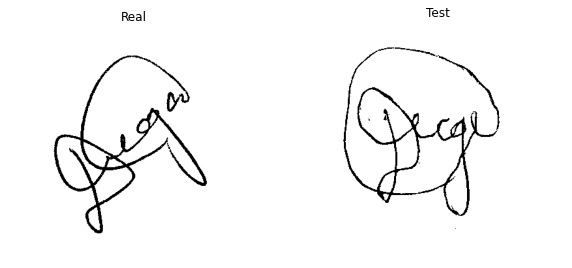

Test image: E_F
Class: personE, This signature is Forged
1/1 [==============================] - 0s 104ms/step


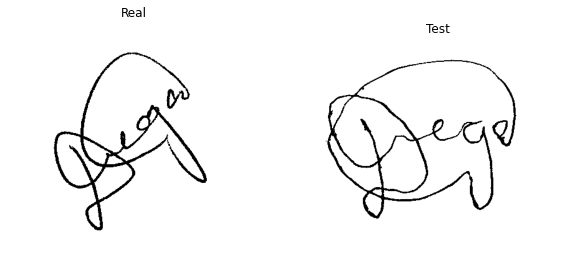

Test image: E_F.png
Class: personE, This signature is Forged
1/1 [==============================] - 0s 109ms/step


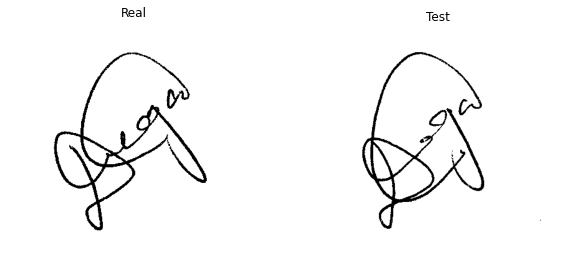

Test image: E_R
Class: personE, This signature is Real
1/1 [==============================] - 0s 121ms/step


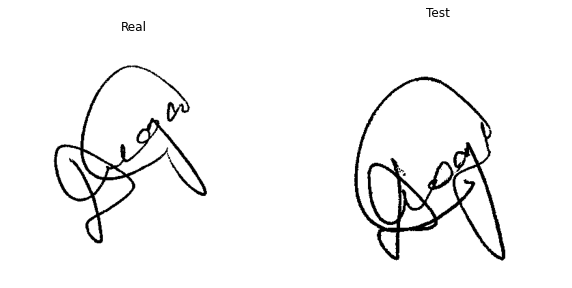

Test image: E_R
Class: personE, This signature is Real
1/1 [==============================] - 0s 104ms/step


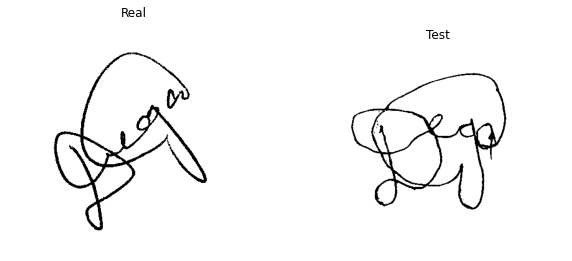

Test image: E_F
Class: personE, This signature is Forged
1/1 [==============================] - 0s 101ms/step


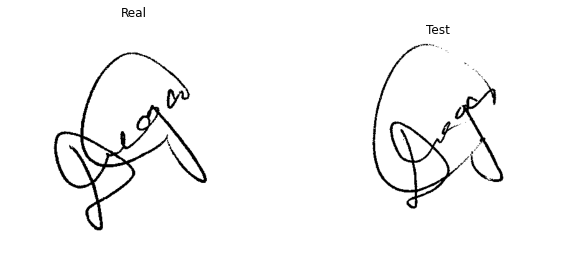

Test image: E_R.png
Class: personE, This signature is Real
1/1 [==============================] - 0s 99ms/step


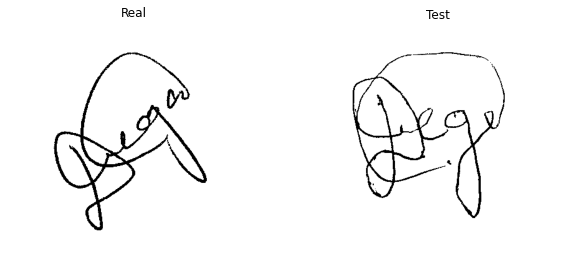

Test image: E_F
Class: personE, This signature is Forged
1/1 [==============================] - 0s 104ms/step


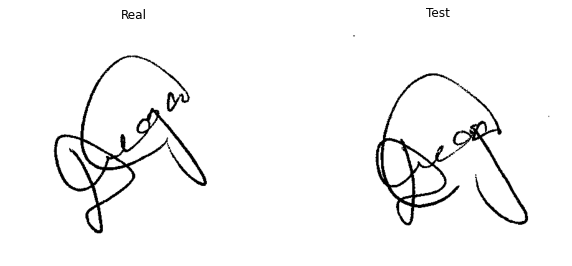

Test image: E_R
Class: personE, This signature is Real


In [ ]:
folder='/content/drive/MyDrive/CV_Dataset/Test'

classification = r'/content/drive/MyDrive/CV_Dataset/Saved models/model_VGG.h5'
similarity= r'/content/drive/MyDrive/CV_Dataset/Saved models/model.h5'

model_classification = load_model(classification)
model_similarity     = load_model(similarity)

for filename in os.listdir(folder):
    imagePath=os.path.join(folder,filename)

    personClass = predict_person(model_classification, imagePath)

    realImagePath = realImages[personClass]
    similarity = detect_similarity(model_similarity, realImagePath, imagePath)
    
    plot(realImagePath, imagePath)
    plt.show()

    print(f"Test image: {filename.split()[0]}")
    print(f"Class: {personClass}, This signature is {similarity}")